# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 0. Import libraries

In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import json
import zipfile
import os

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In previous projects, I have worked with data from TMDB with 5000 movies and have done some analysis on the data. I would like to continue working with this dataset and combine it with another dataset to answer a research question. I find dataset from [Google Dataset Search](https://datasetsearch.research.google.com/), [The U.S. Government’s open data](https://data.gov/), and [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) but I don't find any dataset that I can combine with TMDB dataset. So I decide to use dataset from [grouplens.org](https://grouplens.org/datasets/movielens). Dataset small included 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users (Last updated 9/2018).

Research question: Can two datasets be combined and keep the integrity of the data?

### **1.2.** Gather at least two datasets using two different data gathering methods
- Download data manually
- Programmatically downloading files from a URL

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files manually" method from Kaggle.

The dataset was downloaded from the following link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

Dataset variables:

*   *Variable 1: budget* - The budget in which the movie was made.
*   *Variable 2: id* - The identification number of the movie.
*   *Variable 3: homepage* - The homepage of the movie.
*   *Variable 4: original_language* - The language in which the movie was made.
*   *Variable 5: original_title* - The title of the movie before translation or adaptation.
*   *etc.*

In [3]:
df_tmbd_5000 = pd.read_csv('data/tmdb_5000_movies.csv')
df_tmbd_5000

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

#### Dataset 2

Type: CSV File

Method: The data was gathered using the "Programmatically downloading files" method from grouplens.org

Link dataset: https://grouplens.org/datasets/movielens/latest/

Dataset variables:
*   *Variable 1: movieId* - The identification number of the movie.
*   *Variable 2: imdbId* - The identification number of the movie in the IMDB database.
*   *Variable 3: tmdbId* - The identification number of the movie in the TMDB database.
*   *Variable 4: title* - The title of the movie.
*   *Variable 5: genres* - The genres of the movie.

In [4]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip -P data

--2023-10-18 13:51:37--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip


Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘data/ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   531KB/s    in 1.8s    

2023-10-18 13:51:40 (531 KB/s) - ‘data/ml-latest-small.zip’ saved [978202/978202]



In [5]:
with zipfile.ZipFile("data/ml-latest-small.zip","r") as zip_ref:
    zip_ref.extractall("data/")
    os.remove("data/ml-latest-small.zip")

In [6]:
df_movielens_links = pd.read_csv('data/ml-latest-small/links.csv')
df_movielens_movies = pd.read_csv('data/ml-latest-small/movies.csv')
df_movielens = pd.merge(df_movielens_links, df_movielens_movies, how='inner', on='movieId')
df_movielens.to_csv('data/movielens.csv', index=False)
df_movielens

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,6397426,479308.0,Flint (2017),Drama
9740,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


After pre-processing, we have 2 datasets:
- **tmdb_5000_movies.csv** - 4803 rows, 20 columns
- **movielens.csv** - 9742 rows, 5 columns (original dataset has 2 files: movies.csv and ratings.csv)

Primary key:
- id (tmdb_5000_movies.csv)
- movieId (movielens.csv)

## 2. Assess data
Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1:

In [7]:
df_tmbd_5000.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
df_tmbd_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
df_tmbd_5000.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
df_tmbd_5000.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [11]:
df_tmbd_5000.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [12]:
df_movielens.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [13]:
df_movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
 3   title    9742 non-null   object 
 4   genres   9742 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 380.7+ KB


In [14]:
df_movielens.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


Issue and justification:
- Wrong data type of column `release_date` in `tmdb_5000_movies.csv` dataset. The data type of column `release_date` is object but it should be datetime.
- Wrong data type of column `tmdbId` in `movielens.csv` dataset. The data type of column `tmdbId` is float but it should be int.
- Column `status` and `original_language` in `tmdb_5000_movies.csv` dataset has little number of unique values. It should be categorical data type.

### Quality Issue 2:

In [15]:
df_tmbd_5000.homepage.isnull().sum() / df_tmbd_5000.shape[0]

0.6435561107641058

In [16]:
df_tmbd_5000.release_date.duplicated().sum()

1522

In [17]:
for col in df_tmbd_5000.select_dtypes(include=['object']).columns:
    print(f"Column `{col}`: ", len(df_tmbd_5000[df_tmbd_5000[col] == '[]']))

Column `genres`:  28
Column `homepage`:  0
Column `keywords`:  412
Column `original_language`:  0
Column `original_title`:  0
Column `overview`:  0
Column `production_companies`:  351
Column `production_countries`:  174
Column `release_date`:  0
Column `spoken_languages`:  86
Column `status`:  0
Column `tagline`:  0
Column `title`:  0


Issue and justification:
- The ratio of missing value in column `homepage` in `tmdb_5000_movies.csv` dataset is 64.35%. The missing value is represented by `NaN` value.
- Dataset `tmdb_5000_movies.csv` has empty list in `genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages` columns. The empty list is represented by `[]` value and it should be `NaN` value.

### Tidiness Issue 1:

In [18]:
df_movielens.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [19]:
df_movielens.title.str.extract(r'\((\d{4})\)').value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: count, Length: 106, dtype: int64

Issue and justification: Multiple variables stored in one column. Column `title` contains movie title and year of release with format `Title (Year)`. It should be separated into 2 columns: `title` and `year`.

### Tidiness Issue 2: 

In [20]:
df_tmbd_5000.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [21]:
df_movielens.genres[0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [22]:
genres = json.loads(df_tmbd_5000.genres[0])
genre_names = [genre['name'] for genre in genres]
genre_names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [23]:
df_movielens.genres[0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

Issue and justification: Variables are stored in both columns. Column `genres` in two datasets has different format. It should be merged into one column with format list[Genre1, Genre2, ...].

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [24]:
df_tmbd_5000_clean = df_tmbd_5000.copy()
df_movielens_clean = df_movielens.copy()

### **Quality Issue 1: Wrong data type**

Issue and justification:
- Wrong data type of column `release_date` in `tmdb_5000_movies.csv` dataset. The data type of column `release_date` is object but it should be datetime.
- Wrong data type of column `tmdbId` in `movielens.csv` dataset. The data type of column `tmdbId` is float but it should be int.
- Column `status` and `original_language` in `tmdb_5000_movies.csv` dataset has little number of unique values. It should be categorical data type.

In [25]:
df_tmbd_5000_clean['release_date'] = pd.to_datetime(df_tmbd_5000_clean['release_date'], errors='coerce')
df_tmbd_5000_clean['status'] = df_tmbd_5000_clean['status'].astype('category')
df_tmbd_5000_clean['original_language'] = df_tmbd_5000_clean['original_language'].astype('category')
df_movielens_clean.dropna(inplace=True)
df_movielens_clean['tmdbId'] = df_movielens_clean['tmdbId'].astype('int64')

Validate cleaning:

In [26]:
df_tmbd_5000_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   category      
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [27]:
df_movielens_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9734 non-null   int64 
 1   imdbId   9734 non-null   int64 
 2   tmdbId   9734 non-null   int64 
 3   title    9734 non-null   object
 4   genres   9734 non-null   object
dtypes: int64(3), object(2)
memory usage: 456.3+ KB


Justification:
- The data type of column `release_date` in `tmdb_5000_movies.csv` dataset is datetime.
- The data type of column `tmdbId` in `movielens.csv` dataset is int.
- The data type of column `status` and `original_language` in `tmdb_5000_movies.csv` dataset is category.

### **Quality Issue 2: Non value**

Issue and justification:
- The ratio of missing value in column `homepage` in `tmdb_5000_movies.csv` dataset is 64.35%. The missing value is represented by `NaN` value.
- Dataset `tmdb_5000_movies.csv` has empty list in `genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages` columns. The empty list is represented by `[]` value and it should be `NaN` value.

In [28]:
df_tmbd_5000_clean.drop(columns=['homepage'], inplace=True)
df_tmbd_5000_clean.drop_duplicates(inplace=True)
df_tmbd_5000_clean = df_tmbd_5000_clean.applymap(lambda x: np.nan if x == '[]' else x)
df_tmbd_5000_clean.dropna(inplace=True)
df_tmbd_5000_clean

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,

Validate cleaning:

In [29]:
df_tmbd_5000_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3666 entries, 0 to 4798
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3666 non-null   int64         
 1   genres                3666 non-null   object        
 2   id                    3666 non-null   int64         
 3   keywords              3666 non-null   object        
 4   original_language     3666 non-null   object        
 5   original_title        3666 non-null   object        
 6   overview              3666 non-null   object        
 7   popularity            3666 non-null   float64       
 8   production_companies  3666 non-null   object        
 9   production_countries  3666 non-null   object        
 10  release_date          3666 non-null   datetime64[ns]
 11  revenue               3666 non-null   int64         
 12  runtime               3666 non-null   float64       
 13  spoken_languages      3

Justification: After replace `[]` value by `NaN` value, and drop `homepage` column, the ratio of missing value in `tmdb_5000_movies.csv` dataset is 0%.

### **Tidiness Issue 1: Multiple variables stored in one column**

Issue and justification: Column `title` contains movie title and year of release with format `Title (Year)`. It should be separated into 2 columns: `title` and `year`.

In [30]:
df_movielens_clean['year'] = df_movielens['title'].str.extract(r'\((\d{4})\)')
df_movielens_clean['title'] = df_movielens_clean['title'].str.extract('(.*) \(')

Validate cleaning:

In [31]:
df_movielens_clean.head()

,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,113497,8844,Jumanji,Adventure|Children|Fantasy,1995
2,3,113228,15602,Grumpier Old Men,Comedy|Romance,1995
3,4,114885,31357,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,113041,11862,Father of the Bride Part II,Comedy,1995


Justification: After separate `title` column into `title` and `year` columns, the `title` column contains only movie title and `year` column contains only year of release.

Example: `title` column contains `Avatar` and `year` column contains `2009`.

### **Tidiness Issue 2: Variables are stored in both columns**

Issue and justification: Column `genres` in two datasets has different format. It should be merged into one column with format list[Genre1, Genre2, ...].

In [32]:
df_tmbd_5000_clean['genres'] = df_tmbd_5000_clean['genres'].apply(lambda x: [genre['name'] for genre in json.loads(x)])

In [33]:
df_movielens_clean['genres'] = df_movielens_clean['genres'].apply(lambda x: x.split('|'))

Validate cleaning:

In [34]:
df_tmbd_5000_clean.tail()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4791,13,[Horror],157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1
4792,20000,"[Crime, Horror, Mystery, Thriller]",36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63
4795,0,[Drama],124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,6.0,1
4796,7000,"[Science Fiction, Drama, Thriller]",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What happens if it actually works?,Primer,6.9,658
4798,220000,"[Action, Crime, Thriller]",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238


In [35]:
df_movielens_clean.tail()

,movieId,imdbId,tmdbId,title,genres,year
9737,193581,5476944,432131,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017
9738,193583,5914996,445030,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017
9739,193585,6397426,479308,Flint,[Drama],2017
9740,193587,8391976,483455,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018
9741,193609,101726,37891,Andrew Dice Clay: Dice Rules,[Comedy],1991


Justification: After process `genres` column, the `genres` column contains list of genres in both datasets.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [36]:
df_tmbd_5000_clean = df_tmbd_5000_clean[['id', 'original_title', 'original_language', 'genres', 'budget', 'release_date', 'revenue', 'runtime', 'status', 'vote_average', 'vote_count']]
df_tmbd_5000_clean.to_csv('data/18102023_tmdb_5000_movies_cleaned.csv', index=False)
df_movielens_clean.to_csv('data/18102023_movielens_cleaned.csv', index=False)
df_merge = df_movielens_clean.merge(df_tmbd_5000_clean, left_on='tmdbId', right_on='id', how='inner')
df_merge['genres'] = df_merge['genres_x'] + df_merge['genres_y']
df_merge['genres'] = df_merge['genres'].apply(lambda x: list(set(x)))
df_merge.drop(columns=['id', 'genres_x', 'genres_y'], inplace=True)

In [37]:
df_merge.head()

,movieId,imdbId,tmdbId,title,year,original_title,original_language,budget,release_date,revenue,runtime,status,vote_average,vote_count,genres
0,10,113189,710,GoldenEye,1995,GoldenEye,en,58000000,1995-11-16,352194034,130.0,Released,6.6,1174,"[Action, Thriller, Adventure]"
1,11,112346,9087,"American President, The",1995,The American President,en,62000000,1995-11-17,107879496,106.0,Released,6.5,195,"[Drama, Romance, Comedy]"
2,14,113987,10858,Nixon,1995,Nixon,en,44000000,1995-12-22,13681765,192.0,Released,7.1,71,"[History, Drama]"
3,15,112760,1408,Cutthroat Island,1995,Cutthroat Island,en,98000000,1995-12-22,10017322,119.0,Released,5.7,136,"[Action, Romance, Adventure]"
4,16,112641,524,Casino,1995,Casino,en,52000000,1995-11-22,116112375,178.0,Released,7.8,1307,"[Crime, Drama]"


In [38]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movieId            3106 non-null   int64         
 1   imdbId             3106 non-null   int64         
 2   tmdbId             3106 non-null   int64         
 3   title              3106 non-null   object        
 4   year               3106 non-null   object        
 5   original_title     3106 non-null   object        
 6   original_language  3106 non-null   object        
 7   budget             3106 non-null   int64         
 8   release_date       3106 non-null   datetime64[ns]
 9   revenue            3106 non-null   int64         
 10  runtime            3106 non-null   float64       
 11  status             3106 non-null   object        
 12  vote_average       3106 non-null   float64       
 13  vote_count         3106 non-null   int64         
 14  genres  

In [39]:
df_merge.describe()

,movieId,imdbId,tmdbId,budget,release_date,revenue,runtime,vote_average,vote_count
count,3106.000000,3.106000e+03,3106.000000,3.106000e+03,3106,3.106000e+03,3106.000000,3106.000000,3106.000000
mean,39523.126207,6.425470e+05,36441.473599,3.957246e+07,2001-10-18 06:08:06.799742464,1.193582e+08,110.052479,6.341468,993.615905
min,10.000000,6.864000e+03,5.000000,0.000000e+00,1916-09-04 00:00:00,0.000000e+00,25.000000,2.700000,1.000000
25%,3105.000000,1.201708e+05,4379.250000,8.000000e+06,1998-01-30 00:00:00,1.068192e+07,96.000000,5.800000,189.000000
50%,8416.500000,3.302360e+05,10616.500000,2.500000e+07,2004-03-24 12:00:00,5.200396e+07,106.000000,6.400000,476.000000
75%,72873.500000,9.884575e+05,28523.750000,5.500000e+07,2009-10-17 00:00:00,1.472442e+08,120.000000,6.900000,1168.750000
max,163056.000000,5.215952e+06,376659.000000,3.800000e+08,2016-08-17 00:00:00,2.787965e+09,238.000000,10.000000,13752.000000
std,43540.358019,7.506247e+05,66503.080762,4.510814e+07,NaN,1.890858e+08,19.832068,0.840539,1425.418660


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [40]:
df_merge.to_csv('data/18102023_tmdb_merged.csv', index=False)

Save the cleaned data to folder `data`:
- **18102023_tmdb_5000_movies_clean.csv** - 3666 rows, 11 columns
- **18102023_movielens_clean.csv** - 9734 rows, 6 columns
- **18102023_tbdb_merged.csv** - 3106 rows, 15 columns

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Can two datasets be combined and keep the integrity of the data?

In [41]:
df_merge = pd.read_csv('data/18102023_tmdb_merged.csv')
df_merge

,movieId,imdbId,tmdbId,title,year,original_title,original_language,budget,release_date,revenue,runtime,status,vote_average,vote_count,genres
0,10,113189,710,GoldenEye,1995,GoldenEye,en,58000000,1995-11-16,352194034,130.0,Released,6.6,1174,"['Action', 'Thriller', 'Adventure']"
1,11,112346,9087,"American President, The",1995,The American President,en,62000000,1995-11-17,107879496,106.0,Released,6.5,195,"['Drama', 'Romance', 'Comedy']"
2,14,113987,10858,Nixon,1995,Nixon,en,44000000,1995-12-22,13681765,192.0,Released,7.1,71,"['History', 'Drama']"
3,15,112760,1408,Cutthroat Island,1995,Cutthroat Island,en,98000000,1995-12-22,10017322,119.0,Released,5.7,136,"['Action', 'Romance', 'Adventure']"
4,16,112641,524,Casino,1995,Casino,en,52000000,1995-11-22,116112375,178.0,Released,7.8,1307,"['Crime', 'Drama']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,160644,4193394,340611,Indignation,2016,Indignation,en,0,2016-07-29,0,110.0,Released,6.8,69,['Drama']
3102,160954,3531824,328387,Nerve,2016,Nerve,en,20000000,2016-07-27,83707310,96.0,Released,7.1,2181,"['Mystery', 'Thriller', 'Crime', 'Adventure', ..."
3103,161127,1355631,325789,The Infiltrator,2016,The Infiltrator,en,25000000,2016-07-13,15436808,127.0,Released,6.6,573,"['Crime', 'Drama', 'Thriller']"
3104,161580,4651520,376659,Bad Moms,2016,Bad Moms,en,20000000,2016-07-28,183936074,100.0,Released,6.3,1252,['Comedy']


*Answer to research question:* Yes, two datasets can be combined and keep the integrity of the data in column `genres`. After combine two datasets, the `genres` column contains list of genres in both datasets. The relationship between genres and popularity movies is shown in the following figure.

<Axes: title={'center': 'Top 10 genres of movies'}, ylabel='genres'>

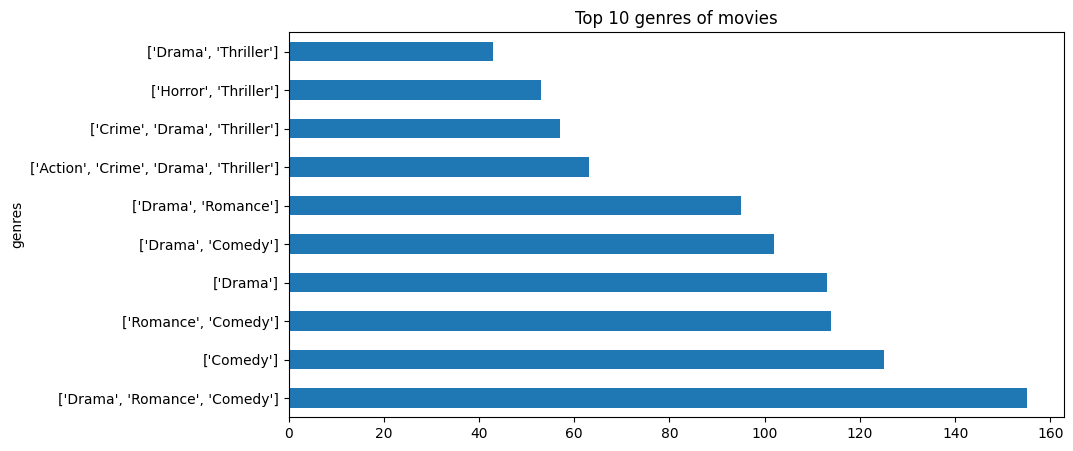

In [48]:
# Plot top 10 genres of movies
df_merge['genres'].value_counts(sort=True).head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 genres of movies')

*Answer to research question:* Process tidy data in column `title` and `year` to get the relationship between year and revenue and budget movies. The relationship between year and revenue movies is shown in the following figure. And we can see that the revenue and budget of movies is increasing over the years.

<Axes: title={'center': 'Correlation between year and revenue'}, xlabel='year', ylabel='revenue'>

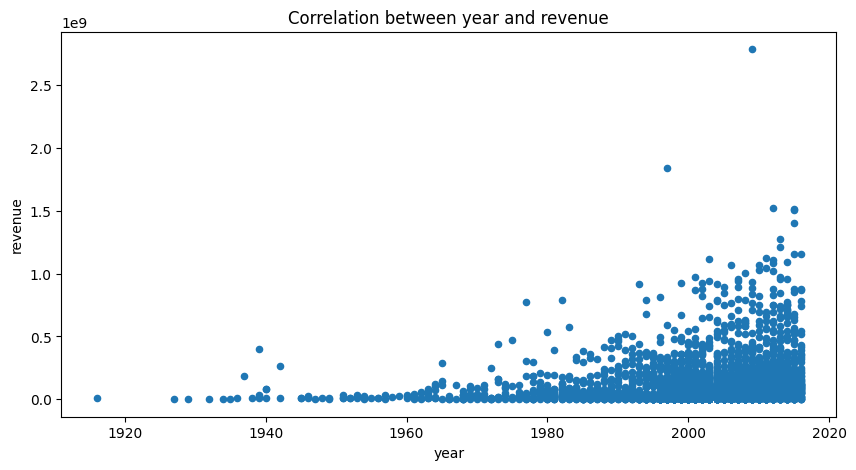

In [49]:
# Plot correlation between year and revenue
df_merge.plot(kind='scatter', x='year', y='revenue', figsize=(10, 5), title='Correlation between year and revenue')

<Axes: title={'center': 'Correlation between year and budget'}, xlabel='year', ylabel='budget'>

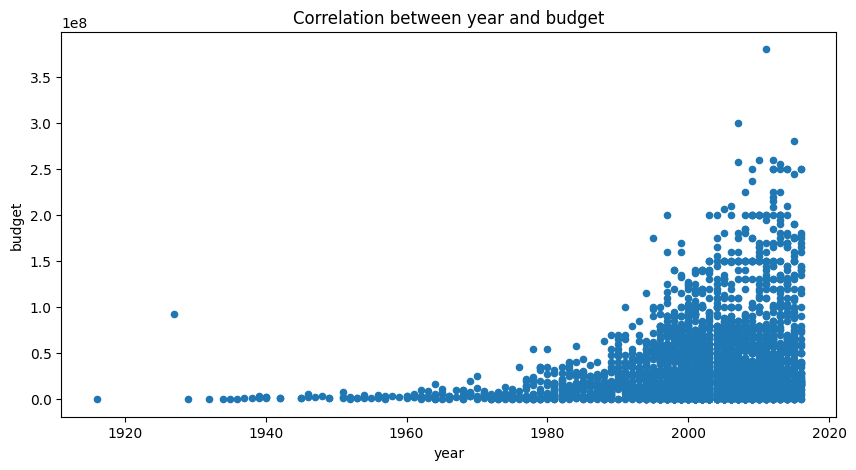

In [50]:
df_merge.plot(kind='scatter', x='year', y='budget', figsize=(10, 5), title='Correlation between year and budget')